In [92]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [178]:
data = pd.read_csv('../data/titanic.csv')

In [179]:
data.describe()

,Pclass,Age,SibSp,Parch,Survived
count,889.000000,889.000000,889.000000,889.000000,889.000000
mean,2.311586,29.315152,0.524184,0.382452,0.382452
std,0.834700,12.984932,1.103705,0.806761,0.486260
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,22.000000,0.000000,0.000000,0.000000
50%,3.000000,28.000000,0.000000,0.000000,0.000000
75%,3.000000,35.000000,1.000000,0.000000,1.000000
max,3.000000,80.000000,8.000000,6.000000,1.000000


In [180]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    889 non-null    int64  
 1   Name      889 non-null    object 
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Ticket    889 non-null    object 
 7   Embarked  889 non-null    object 
 8   Survived  889 non-null    int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 62.6+ KB


In [181]:
cor = data.corr(numeric_only = True)
data

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Embarked,Survived
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,S,0
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,C,1
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,S,1
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,S,1
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,S,0
...,...,...,...,...,...,...,...,...,...
884,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,S,0
885,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,S,1
886,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,S,0
887,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,C,1


<Axes: >

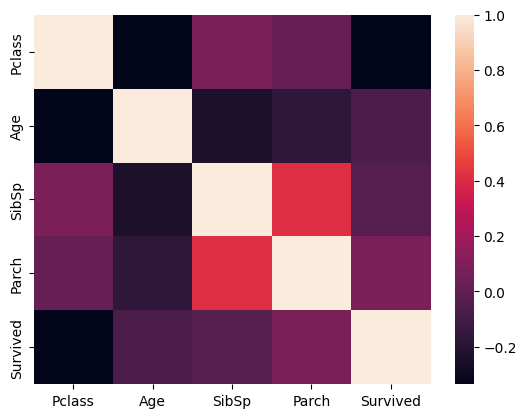

In [182]:
sns.heatmap(cor)

<Axes: >

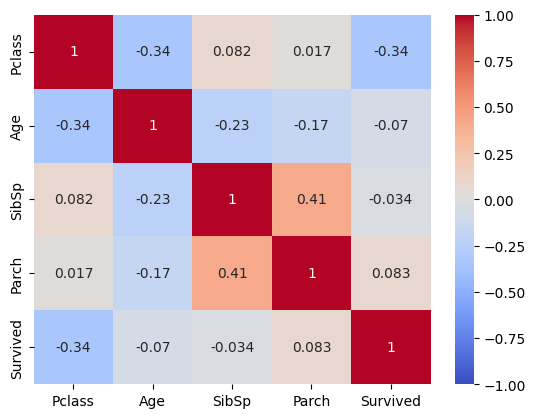

In [183]:
sns.heatmap(cor, cmap = 'coolwarm', vmin = -1, vmax = 1, annot = True)

In [184]:
data = data.drop(['Name', 'Ticket'], axis = 1)


In [185]:
data = pd.get_dummies(data, columns = ['Sex','Embarked'])

In [186]:
data

,Pclass,Age,SibSp,Parch,Survived,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,0,False,True,False,False,True
1,1,38.0,1,0,1,True,False,True,False,False
2,3,26.0,0,0,1,True,False,False,False,True
3,1,35.0,1,0,1,True,False,False,False,True
4,3,35.0,0,0,0,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...
884,2,27.0,0,0,0,False,True,False,False,True
885,1,19.0,0,0,1,True,False,False,False,True
886,3,28.0,1,2,0,True,False,False,False,True
887,1,26.0,0,0,1,False,True,True,False,False


In [187]:
data = data.astype(int)


In [188]:
bool_cols = ['Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S']
data[bool_cols] = data[bool_cols].astype(int)

In [189]:
data

,Pclass,Age,SibSp,Parch,Survived,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22,1,0,0,0,1,0,0,1
1,1,38,1,0,1,1,0,1,0,0
2,3,26,0,0,1,1,0,0,0,1
3,1,35,1,0,1,1,0,0,0,1
4,3,35,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
884,2,27,0,0,0,0,1,0,0,1
885,1,19,0,0,1,1,0,0,0,1
886,3,28,1,2,0,1,0,0,0,1
887,1,26,0,0,1,0,1,1,0,0


In [190]:
x = data.drop('Survived', axis = 1)
y = data['Survived']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 100)
data.head()

,Pclass,Age,SibSp,Parch,Survived,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22,1,0,0,0,1,0,0,1
1,1,38,1,0,1,1,0,1,0,0
2,3,26,0,0,1,1,0,0,0,1
3,1,35,1,0,1,1,0,0,0,1
4,3,35,0,0,0,0,1,0,0,1


In [191]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)  # max_iter 충분히 크게 설정
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [192]:
pred = model.predict(x_test)

In [193]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, pred)

0.7808988764044944

In [194]:
model.coef_

array([[-1.18841273e+00, -4.00787890e-02, -3.26089293e-01,
         3.39724733e-04,  1.31495084e+00, -1.31560949e+00,
         1.18895842e-01,  5.74442643e-03, -1.25298927e-01]])

In [195]:
pd.Series(model.coef_[0], index = x.columns)

Pclass       -1.188413
Age          -0.040079
SibSp        -0.326089
Parch         0.000340
Sex_female    1.314951
Sex_male     -1.315609
Embarked_C    0.118896
Embarked_Q    0.005744
Embarked_S   -0.125299
dtype: float64

In [196]:
data['Family'] = data['SibSp'] + data['Parch']

In [197]:
data.drop(['SibSp', 'Parch'], axis = 1, inplace = True)

In [198]:
data.head()

,Pclass,Age,Survived,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Family
0,3,22,0,0,1,0,0,1,1
1,1,38,1,1,0,1,0,0,1
2,3,26,1,1,0,0,0,1,0
3,1,35,1,1,0,0,0,1,1
4,3,35,0,0,1,0,0,1,0


In [199]:
x = data.drop('Survived', axis = 1)
y = data['Survived']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 100)

In [200]:
model = LogisticRegression()
model.fit(x_train, y_train)

pred = model.predict(x_test)

In [201]:
accuracy_score(y_test, pred)

0.7921348314606742